In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv("./data/Social_Network_Ads.csv")
df=df.iloc[:,2:]

In [56]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [57]:
df.shape

(400, 3)

In [58]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
print(X_train.shape,X_test.shape)

(280, 2) (120, 2)


# **1. Standardization**

## Apply Standard Scalar

In [61]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [62]:
# fit on the train set so that it  Computes the mean and std for scaling
scalar.fit(X_train)
# Now transform the data
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)
scalar.mean_

array([3.75750000e+01, 7.05892857e+04])

### i. Before Scaling 

In [63]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [64]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


### i. After Scaling 

In [65]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [66]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


### Effect of Scaling

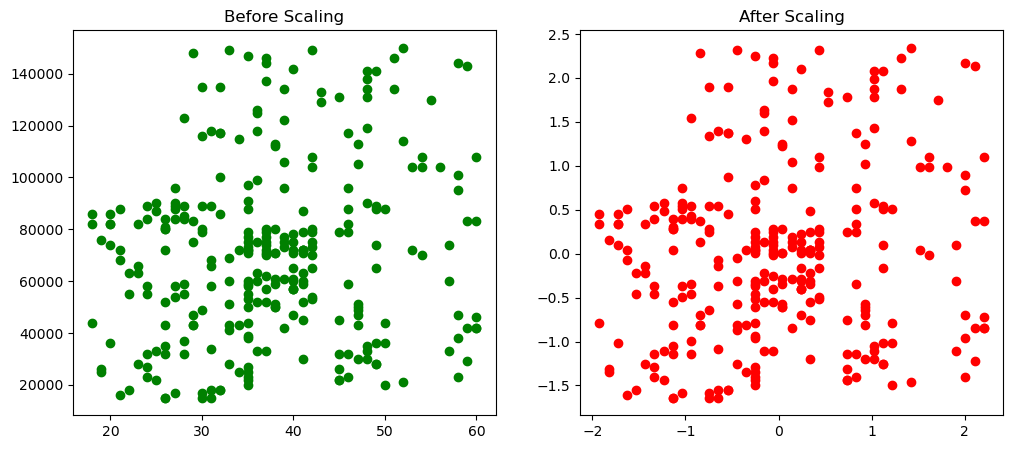

In [67]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='green')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

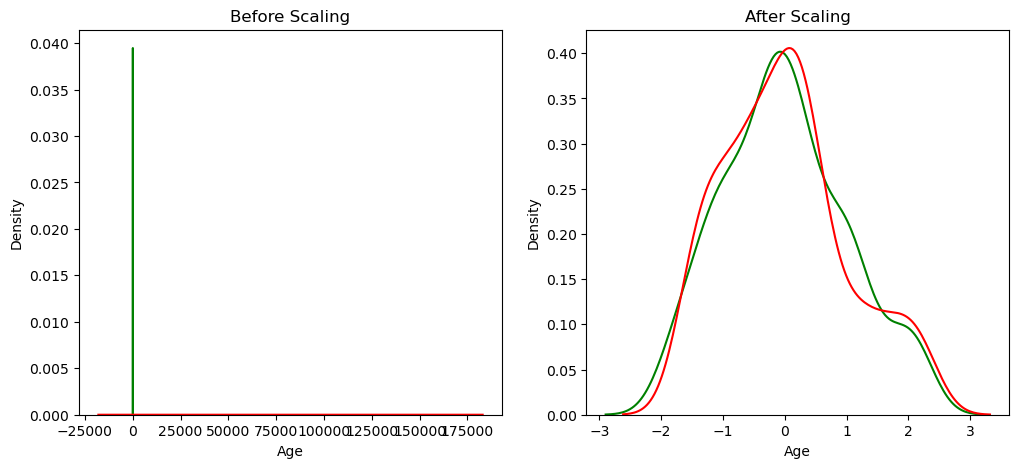

In [68]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=[12,5])

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1,color='green')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,color='red')

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2,color='green')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,color='red')
plt.show()

# **2. Normalization**

In [69]:
df = pd.read_csv('./data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [70]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [71]:
X=df.drop('Class label',axis=1)
y=df['Class label']

## Apply MinMax Scalar

In [72]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
# fit on the train set so that it  Computes the mean and std for scaling
scalar.fit(X_train)
# Now transform the data
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

### i. Before Scaling 

In [75]:
X_train

,Alcohol,Malic acid
138,13.49,3.59
104,12.51,1.73
78,12.33,0.99
36,13.28,1.64
93,12.29,2.83
...,...,...
71,13.86,1.51
106,12.25,1.73
14,14.38,1.87
92,12.69,1.53


In [76]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


### ii. After Scaling 

In [77]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,Alcohol,Malic acid
0,0.647368,0.549898
1,0.389474,0.171079
2,0.342105,0.020367
3,0.592105,0.152749
4,0.331579,0.395112
...,...,...
119,0.744737,0.126273
120,0.321053,0.171079
121,0.881579,0.199593
122,0.436842,0.130346


In [78]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


### iii. Effect of Scaling

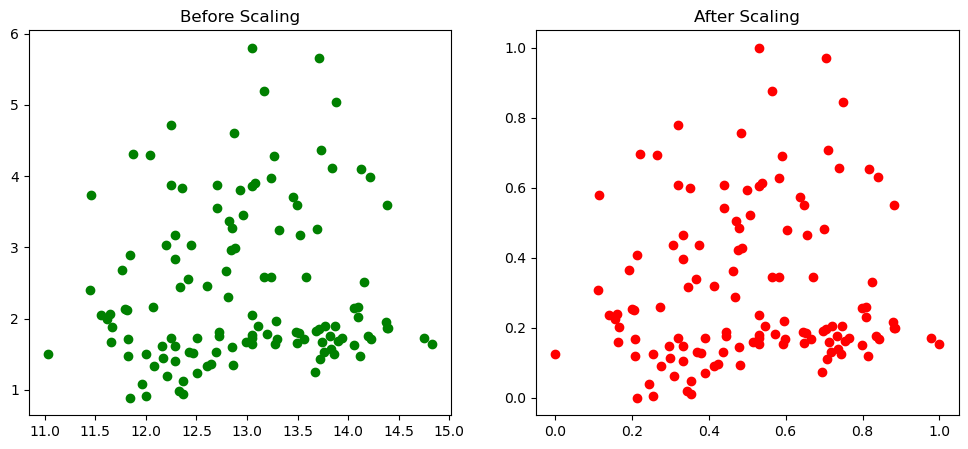

In [80]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],color='green')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],color='red')
ax2.set_title("After Scaling")
plt.show()

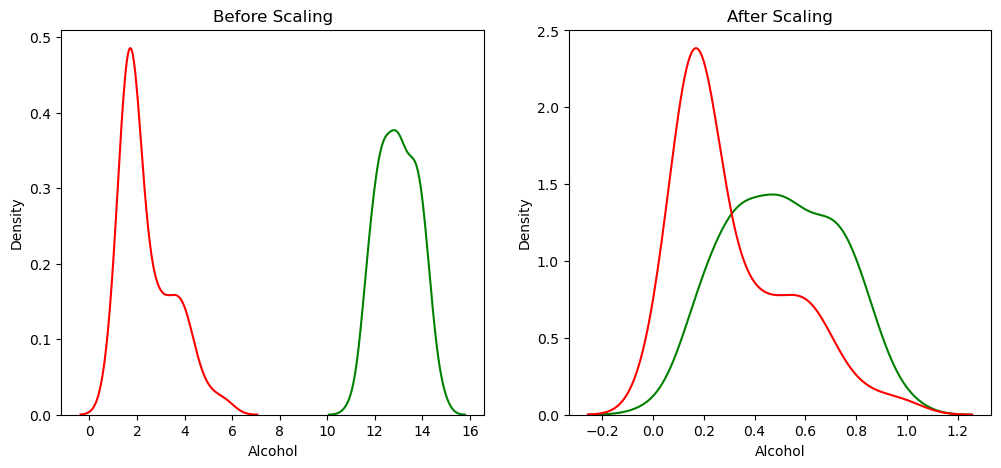

In [81]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=[12,5])

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1,color='green')
sns.kdeplot(X_train['Malic acid'],ax=ax1,color='red')

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,color='green')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,color='red')
plt.show()